In [1]:
!nvidia-smi

Mon May 24 11:08:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
torch.__version__

'1.8.1+cu101'

In [3]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 204kB 8.1MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 


In [4]:
import fastai
fastai.__version__

'2.3.1'

# Fastai vision


In [5]:
from fastai.vision.all import *

In [6]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 33.14 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [9]:
%pwd 'PlantVillage-Dataset'

'/content'

In [11]:
path = Path('/content/PlantVillage-Dataset/raw/color')
path.ls()

(#38) [Path('/content/PlantVillage-Dataset/raw/color/Tomato___Septoria_leaf_spot'),Path('/content/PlantVillage-Dataset/raw/color/Tomato___Target_Spot'),Path('/content/PlantVillage-Dataset/raw/color/Grape___healthy'),Path('/content/PlantVillage-Dataset/raw/color/Cherry_(including_sour)___Powdery_mildew'),Path('/content/PlantVillage-Dataset/raw/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'),Path('/content/PlantVillage-Dataset/raw/color/Corn_(maize)___Northern_Leaf_Blight'),Path('/content/PlantVillage-Dataset/raw/color/Pepper,_bell___Bacterial_spot'),Path('/content/PlantVillage-Dataset/raw/color/Apple___Cedar_apple_rust'),Path('/content/PlantVillage-Dataset/raw/color/Orange___Haunglongbing_(Citrus_greening)'),Path('/content/PlantVillage-Dataset/raw/color/Soybean___healthy')...]

In [13]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=RandomResizedCrop(128,min_scale=0.4))

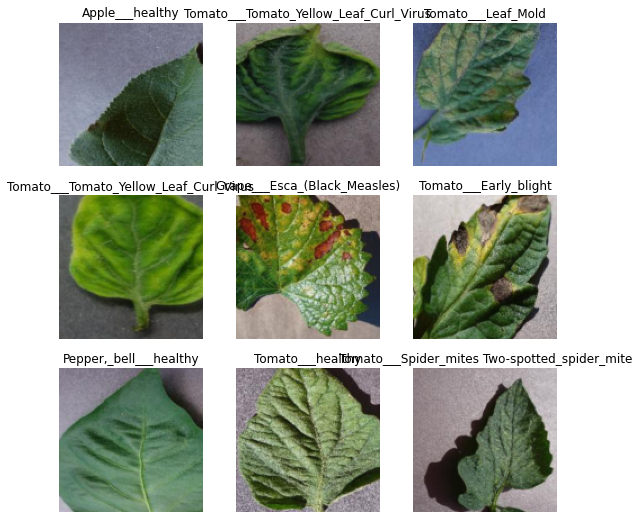

In [14]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet101, metrics=[error_rate,accuracy])

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.013182567432522774)

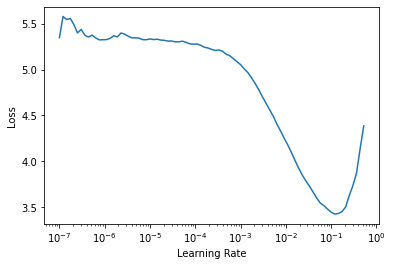

In [17]:
learn.lr_find()

In [18]:
learn.fine_tune(3, 0.012)

epoch,train_loss,valid_loss,error_rate,accuracy,time


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.507572,0.227280,0.068226,0.931774,02:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.245255,0.106287,0.034251,0.965749,02:31
1,0.101296,0.041033,0.012982,0.987018,02:29
2,0.034145,0.018822,0.006721,0.993279,02:31


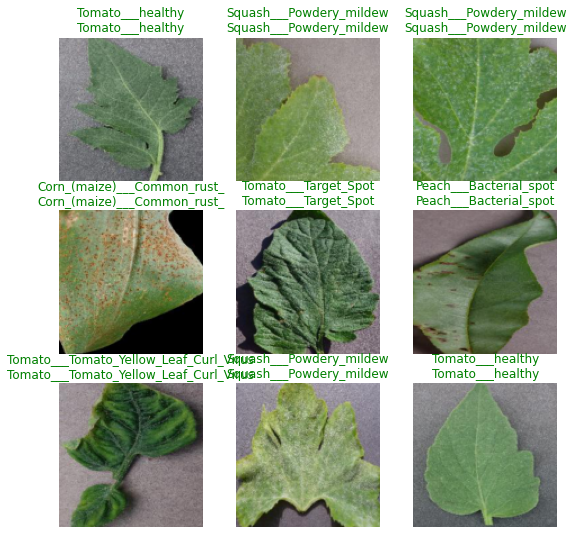

In [19]:
learn.show_results()

In [20]:
interp = Interpretation.from_learner(learn)

In [21]:
interp2=ClassificationInterpretation.from_learner(learn)

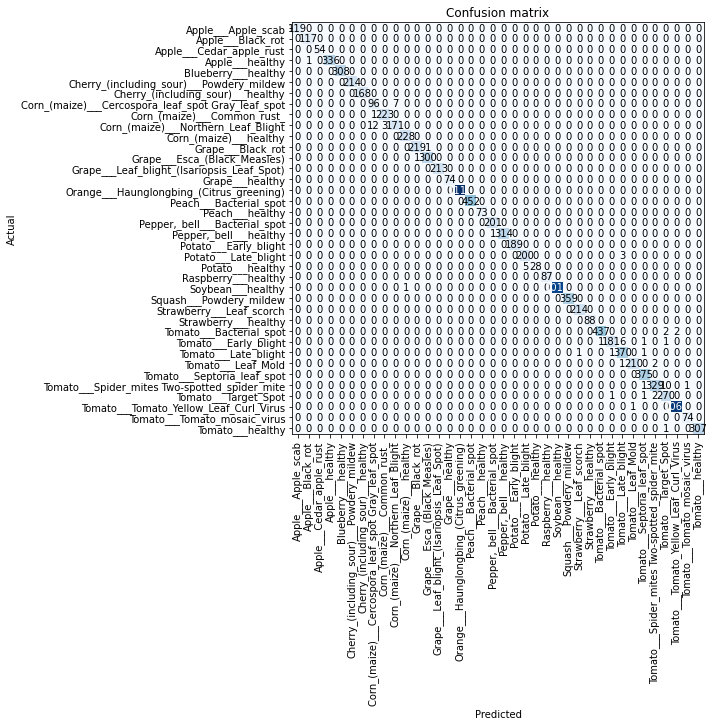

In [22]:
interp2.plot_confusion_matrix(figsize=(15,10))

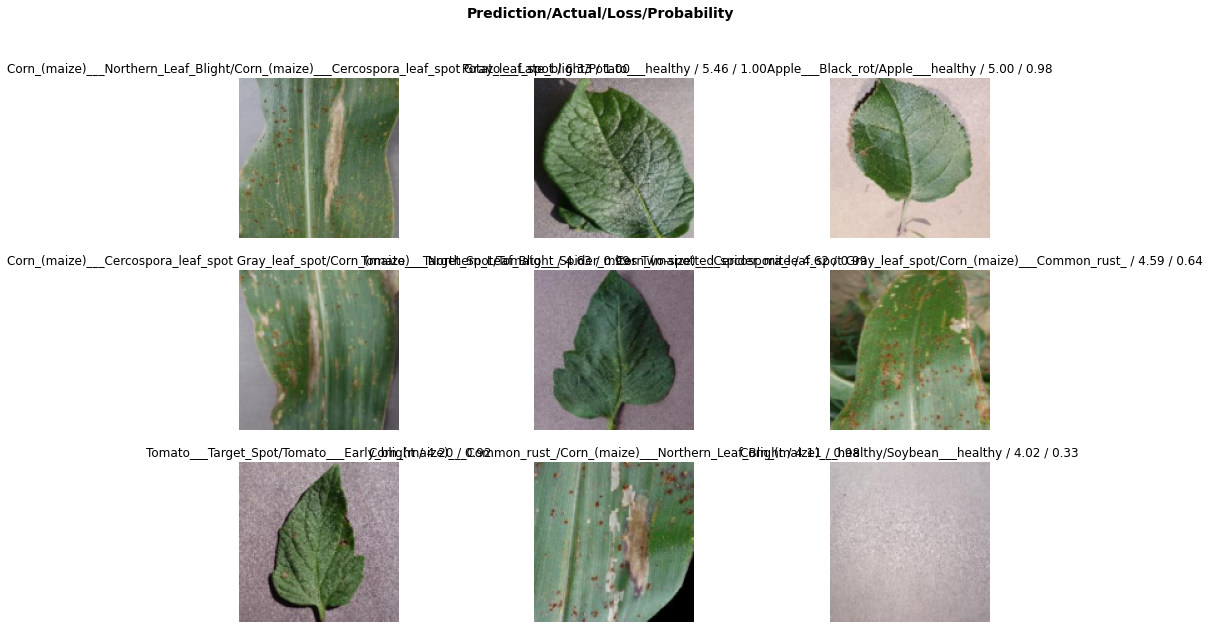

In [23]:
interp.plot_top_losses(9, figsize=(15,10))

In [1]:
learn.save('model_plant.pkl')

NameError: name 'learn' is not defined